## Coupled ODEs

A general form of $N$ first-order simultaneous ordinary differential equations in $N$ variables is
$$ \frac{d\boldsymbol{r}}{dt} = \boldsymbol{f}(\boldsymbol{r},t) $$
where $\boldsymbol{r}=(x,y,...)$ and $\boldsymbol{f}$ is a vector of functions $\boldsymbol{f}(\boldsymbol{r},t)=(f_x(\boldsymbol{r},t),f_y(\boldsymbol{r},t),...)$.  We can use the multivariable version of the RK-4 method, which is a vector generalization of the one-variable version:
$$
\begin{align}
\boldsymbol{k_1} =& h\boldsymbol{f}(\boldsymbol{r},t) \\
\boldsymbol{k_2} =& h\boldsymbol{f}(\boldsymbol{r}+\frac{1}{2}\boldsymbol{k_1},t+\frac{1}{2}h) \\
\boldsymbol{k_3} =& h\boldsymbol{f}(\boldsymbol{r}+\frac{1}{2}\boldsymbol{k_2},t+\frac{1}{2}h) \\
\boldsymbol{k_4} =& h\boldsymbol{f}(\boldsymbol{r}+\boldsymbol{k_3},t+h) \\
\boldsymbol{r}(t+h) =& \boldsymbol{r}(t) + \frac{1}{6}(\boldsymbol{k_1}+2\boldsymbol{k_2} + 2\boldsymbol{k_3}+ \boldsymbol{k_4})
\end{align}
$$

Solve the equations
$$ \begin{align}
\frac{dx}{dt} =& \ xy - x \\
\frac{dy}{dt} =& \ y - xy + \sin^2(\omega t) 
\end{align} $$
from $t=0$ to $t=10$, for $\omega=1$, with the initial condition $x=y=1$ at $t=0$. 

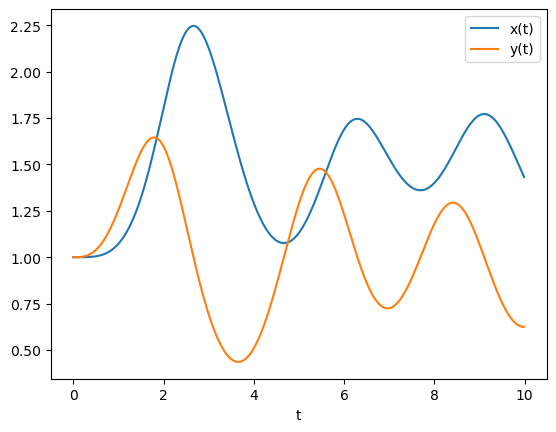

In [1]:
import numpy as np
import matplotlib.pyplot as plt

omega = 1

def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(omega*t)**2
    return np.array([fx,fy],float)

a = 0
b = 10
N = 1000
h = (b-a)/N

tp = np.arange(a,b,h)
xp = []
yp = []

r = np.array([1.0, 1.0],float) # initial values of x and y at t=0
for t in tp:
    xp.append(r[0])
    yp.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

plt.plot(tp,xp,label='x(t)')
plt.plot(tp,yp,label='y(t)')
plt.xlabel('t')
plt.legend()
plt.show()

### If you run this a little bit longer, you will see it start to behave like a forced oscillator!

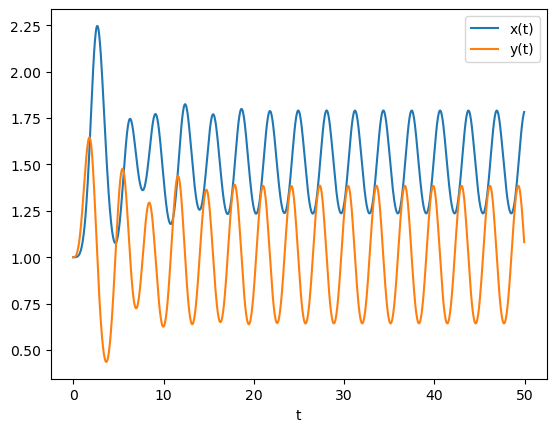

In [2]:
import numpy as np
import matplotlib.pyplot as plt

omega = 1

def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(omega*t)**2
    return np.array([fx,fy],float)

a = 0
b = 50
N = 1000
h = (b-a)/N

tp = np.arange(a,b,h)
xp = []
yp = []

r = np.array([1.0, 1.0],float) # initial values of x and y at t=0
for t in tp:
    xp.append(r[0])
    yp.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

plt.plot(tp,xp,label='x(t)')
plt.plot(tp,yp,label='y(t)')
plt.xlabel('t')
plt.legend()
plt.show()

## Second-order Differential Equations

A second-order differential equation with one-dependent variable $x$
$$\frac{d^2x}{dt^2} = f(x,\frac{dx}{dt},t) $$
can be replaced by two simultaneous first-order differential equations:
$$
\begin{align}
\frac{dx}{dt} =& y \\
\frac{dy}{dt} =& f(x,y,t)
\end{align}
$$

### The Nonlinear Pendulum

$$\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin\theta $$
Assume $l=10\ {\rm cm} = 0.1\ {\rm m}$. We know $g=9.81$ m/s$^2$. Start at near vertical position $\theta=179^\circ$, where the inital velocity $\omega=0$.

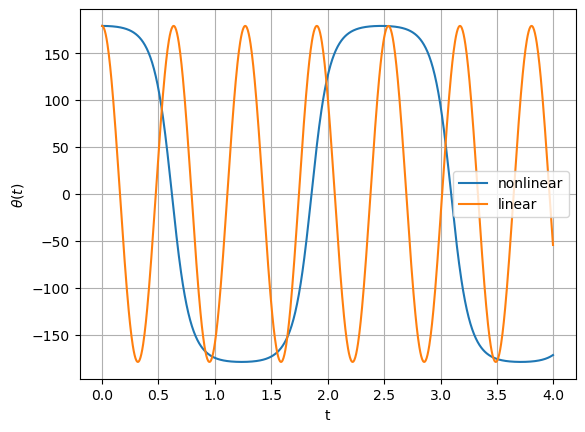

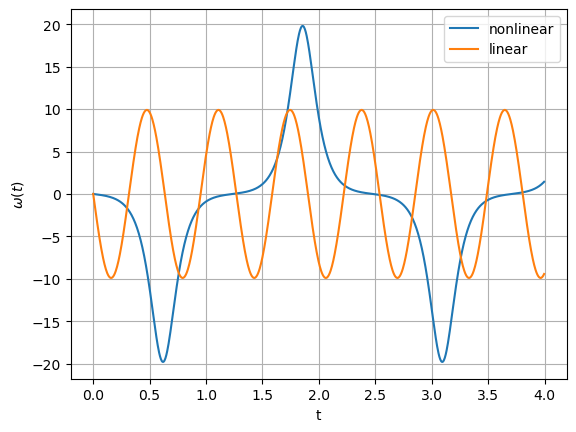

In [3]:
# constants 
g = 9.81    # m/s/s
l = 0.1     # m

def f(r,t):
    theta = r[0]  # convert degrees to radians
    omega = r[1]
    ft = omega
    fo = -g/l*np.sin(theta)
    return np.array([ft,fo],float)

a = 0
b = 4
N = 1000
h = (b-a)/N

tp = np.arange(a,b,h)
thetap = []
omegap = []

r = np.array([179*np.pi/180,0],float)

for t in tp:
    thetap.append(r[0])
    omegap.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plt.plot(tp,np.array(thetap)*180/np.pi,label='nonlinear')
plt.plot(tp,thetap[0]*180/np.pi*np.cos(np.sqrt(g/l)*tp),label='linear')
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$')
plt.legend()
plt.grid()
plt.show() 

plt.figure()
plt.plot(tp,omegap,label='nonlinear')
plt.plot(tp,-np.sqrt(g/l)*np.sin(np.sqrt(g/l)*tp),label='linear')
plt.xlabel('t')
plt.ylabel(r'$\omega(t)$')
plt.legend()
plt.grid()
plt.show()      

# Try it yourself

### Total 4 marks

Create an animation of the motion of the nonlinear pendulum above.

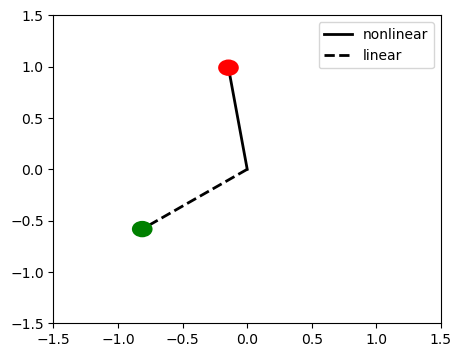

In [4]:
%matplotlib inline                 
from IPython.display import HTML   # ONLY for Jupyter, these 2 lines allow inline animation
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anim

# plot figure as in a static plot to be modified later
fig, ax = plt.subplots(figsize=(5,4))

xp = np.sin(thetap)
yp = -np.cos(thetap)


thetal = thetap[0]*np.cos(np.sqrt(g/l)*tp)

xl = np.sin(thetal)
yl = -np.cos(thetal)

bob_radius = 0.08
circle = ax.add_patch(plt.Circle((xp[0],yp[0]), bob_radius,
                      fc='r', zorder=3))
circle2 = ax.add_patch(plt.Circle((xl[0],yl[0]), bob_radius,
                      fc='g', zorder=3))

line = ax.plot(tp[0], 0, c='k',lw=2,label='nonlinear')[0]
line2 = ax.plot(tp[0], 0,c='k',ls='--',lw=2,label='linear')[0]
ax.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])
ax.legend()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = xp[frame]
    y = yp[frame]
    x0 = xl[frame]
    y0 = yl[frame]
    # update the line plot:
    line.set_data([0,x],[0,y])
    line2.set_data([0,x0],[0,y0])
    circle.set_center((x, y))
    circle2.set_center((x0, y0))
    
ani = anim.FuncAnimation(fig=fig, func=update, frames=len(tp), interval=30)
HTML(ani.to_html5_video())      